<a href="https://colab.research.google.com/github/YoYolops/Analise-de-Dados-da-UFCG/blob/master/Yohan_Lopes_Rodrigues_TC23_Lab_e_EP03_(Template).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Reducibilidade (Laboratório)

Este atividade em laboratório tem como enfoque a resolução de problemas através da técnica de redução.
As questões abaixo correspondem à avaliação EP03.

**Observação:**
* As células de código possuem dependências com as células anteriores de sua
seção.
* A célula de instalação pode demorar alguns minutos para executar devido as bibliotecas gráficas. Mas só precisa ser executada uma vez por sessão.


In [1]:
# @title Instalação
import networkx as nx
!pip install automata-lib
import matplotlib.pyplot as plt
!git clone https://github.com/pdlmachado/gtufcg.git
from gtufcg.util.draw_util import drawgv_graph
import unittest
from typing import Any

import inspect
def is_function_invoked(caller_func, callee_func):
    source_code = inspect.getsource(caller_func)
    return callee_func.__name__ in source_code

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.2/125.2 kB 2.3 MB/s eta 0:00:00
Cloning into 'gtufcg'...
remote: Enumerating objects: 1079, done.
remote: Counting objects: 100% (482/482), done.
remote: Compressing objects: 100% (239/239), done.
remote: Total 1079 (delta 301), reused 372 (delta 233), pack-reused 597 (from 1)
Receiving objects: 100% (1079/1079), 1.80 MiB | 8.25 MiB/s, done.
Resolving deltas: 100% (717/717), done.


## Redução por Mapeamento

A redução de problemas por mapeamento (ou simplesmente redução por mapeamento) é uma técnica fundamental na teoria da computação, usada para demonstrar a complexidade ou a insolubilidade de problemas. Em termos simples, essa técnica permite que um problema seja transformado em outro de modo que uma solução para o segundo problema também resolva o primeiro.

Dado um problema $A$ e um problema
$B$, uma redução por mapeamento $f$ transforma instâncias de
$A$ em instâncias de $B$. Isso significa que, se tivermos um algoritmo que resolve $B$, podemos usar esse algoritmo para resolver
$A$, através dessa transformação.
Formalmente, dizemos que
$A$ é **redutível** a
$B$ **por mapeamento**, denotado por $A \le_m B$, se e somente se existe uma **função computável** $f$ **em tempo finito** tal que, para toda instância $x$
 do problema $A$, $f(x)$ é uma instância de $B$.

![bg right width:600px](https://i.stack.imgur.com/3uFBe.jpg)


## Representando TMs e Reduções por Funções Python

Nesta atividade, iremos utilizar funções Python para construir reduções da seguinte forma:

* Máquinas de Turing (TMs) serão representadas por funções booleanas em Python que recebem como parâmetro uma cadeia de entrada para inicializar a fita e retornam `True` (a máquina parou em um estado de aceitação), `False` (a máquina parou em um estado de rejeição) ou `None` (não é possível determinar se a máquina vai parar).

* Reduções por mapeamento, também definidas como TMs na literatura, serão representadas por funções recebem como entrada uma cadeia e retornam uma nova cadeia como uma transformação da recebida como parâmetro.

* Para problemas indecidíveis, construimos apenas a redução por mapeamento e um esboço da máquina resultante. As máquinas base são codificadas com `pass`.

## Redução entre Problemas Indecidíveis

Como exemplo, vamos considerar a redução do problema $A_{TM}$ para o problema $E_{TM}$ vista na aula passada.

*  $A_{TM} = \{ \langle M,w \rangle \mid M \text{ é uma função que representa uma TM e } M \text{ aceita w} \}$

* $E_{TM} = \{ \langle M \rangle \mid M \text{ é uma função que representa uma TM e } L(M) = \emptyset \}$

Note que $E_{TM}$ corresponde a classe de funções que sempre retornam `False`.

Seja:

* `M_E` uma função (TM) que decide se uma função (TM) `M` reconhece uma linguagem vazia
* `M_A` uma função (TM) que decide se `M` aceita uma cadeia `w`. A função `M_A` será definida em termos de `M_E`.

Para utilizarmos `M_E` na solução para `M_A`, precisaremos transformar a entrada de `M_A` ( `M`,`w`), em uma entrada para `M_E`, uma única função (TM).

Construímos uma função `f1` que retorna uma função, a partir de (`M, w`). A função retornada recebe uma cadeia `x` e aceita `x` se for igual a `w`, desde que `M` aceite `w`, caso contrário aceita a linguagem vazia.

Quando esta função for passada para `E`, caso `E` retorne `True` (linguagem vazia) isto indicará que `w` não é aceita por `M`.

O código Python abaixo ilustra este procedimento.

In [ ]:
# Retorna uma entrada para E a partir de uma entrada para A.
# A função retornada incorpora os parâmetros M e w

def f1 (M,w):
  return lambda x: M(w) if x == w else False

def M_E (M):
  # Determina se M reconhece uma linguagem vazia
  pass

def M_A (M,w):
  M1 = f1(M,w)
  if M_E(M1):
    return False
  else:
    return True

# TMs para teste
def M1 (w): # cadeias de tamanho > 2 - linguagem não vazia
  return len(w) > 2
def M2 (w): # Cadeias com ao menos uma ocorrência de b
  return 'b' in w

# Testando a transformação f
# Y1 é uma entrada para E que reconhece apenas aaa, já que M1 aceita aaa
Y1 = f1(M1,'aaa')
assert Y1('aaa') is True
assert Y1('aaaaa') is False
# Y2 é uma entrada para E que reconhece a linguagem vazia, já que M2 não aceita aaa
Y2 = f1(M2,'aaa')
assert Y2('aaa') is False
assert Y2('aabaaa') is False

# Redução entre Problemas Decidíveis

* $A$ - determinar se um grafo G é hamiltoniano

* $B$ - determinar o peso de um ciclo hamiltoniano de menor peso (TSP), caso o grafo seja hamiltoniano, ou o peso do passeio fechado de menor peso, caso o grafo não seja hamiltoniano

Uma descrição mais detalhada desta redução encontra-se TC22 - Notas de Aula.

As seguintes funções são construídas abaixo:

* `M_B` - uma função (TM) que implementa um algoritmo para o problema $B$.

* `f2` - uma função (TM) que implementa uma transformação da entrada de $A$ para uma entrada de $B$

* `M_A` - uma função (TM) que implementa um algoritmo para o problema $A$, usando `M_B`

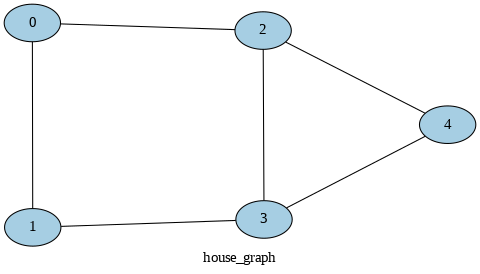

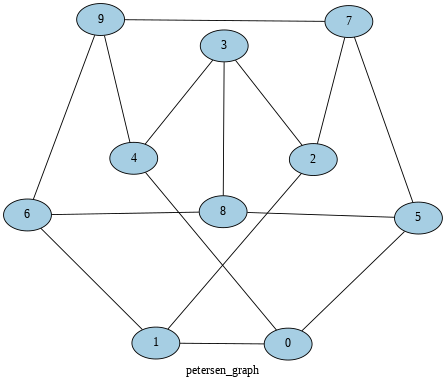

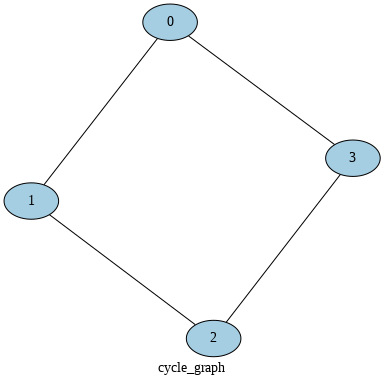

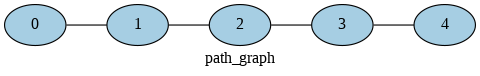

In [ ]:
# @title  {"run":"auto","vertical-output":true}
# @title
# Importação de algoritmos
from networkx.algorithms.approximation import traveling_salesman_problem as tsp

def f2 (g: nx.Graph) -> nx.Graph:
  # Retorna um grafo completo a partir de g
  h = nx.Graph()
  node_list = list(g.nodes)
  h.add_nodes_from(node_list)
  for i in range(len(node_list)-1):
    u = node_list[i]
    for j in range(i,len(node_list)):
      if not i == j:
        v = node_list[j]
        if g.has_edge(u,v):
          h.add_edge(u,v, weight=1,label='1')
        else:
          h.add_edge(u,v, weight=len(node_list),label=str(len(node_list)))
  return h

def M_B (c: nx.Graph) -> int:
  # calcula passeio fechado de menor peso
  low_cycle=tsp(c)
  # retorna o peso do passeio
  return nx.path_weight(c,low_cycle,'weight')

def M_A (g: nx.Graph()):
  # calcula o peso do passeio de menor peso
  c = f2(g)
  # Aceita se peso for igual a quantidade de vértices do grafo
  if M_B(c) == g.number_of_nodes():
    return True
  else:
    return False

# Grafos para teste
G1 = nx.house_graph()
G2 = nx.petersen_graph()
G3 = nx.cycle_graph(4)
G4 = nx.path_graph(5)
drawgv_graph(G1,name='h',title='house_graph')
drawgv_graph(G2,name='p',title='petersen_graph')
drawgv_graph(G3,name='c',title='cycle_graph')
drawgv_graph(G4,name='t',title='path_graph',layoutid='dot')

# Testes
assert M_A(G1) is True
assert M_A(G2) is False
assert M_A(nx.cycle_graph(9))  is True
assert M_A(nx.path_graph(10))  is False

# EP03

Codifique as funções solicitadas abaixo.

## (01)

Considere o problema de determinar se uma cadeia é gerada por uma expressão regular:

$A_{REX} = \{ \langle R,w \rangle \mid R \text{ é uma expressão regular que gera } w \}$

Construa as funções python abaixo que implementam um algoritmo para resolver este problema através de uma redução ao problema de determinar se um NFA aceita uma cadeia:

$A_{NFA} = \{ \langle B,w \rangle \mid B \text{ é um NFA que aceita } w \}$

As seguintes funções devem ser implementadas:

* `f3` - Transforma a entrada de `M_REX` em uma entrada para `M_NFA`

* `M_REX` - Determina se uma cadeia $w$ é gerada por $R$. Deve invocar as funções `M_NFA` e `f3`, onde `M_NFA`, já implementada, recebe um NFA `N` e uma cadeia `w` e decide se `N` aceita `w`.

> Dica:  
> * Em `f3`, use a função `from_regex` do pacote NFA de `automata-lib` para construir o NFA.
> * Considere que as funções recebem apenas entradas válidas

In [14]:
from re import M
from automata.fa.nfa import NFA
from automata.base.exceptions import RejectionException

def f3 (R: str) -> NFA:
  return NFA.from_regex(R)

def M_NFA(N: NFA, w: str) -> bool:
  try:
    # Executa N com w
    gen = list(N.read_input_stepwise(w))
    # RejectionException não foi lançada - w é aceita
    return True
  except RejectionException:
    # RejectionException foi lançada - w não é aceita
    return False

def M_REX(R: str, w: str) -> bool:
  # Escreva aqui o seu código
  return M_NFA(f3(R), w)

# Testes Manuais
assert M_REX('ab*','abb') is True
assert M_REX('a+b*','bbb') is False

In [16]:
# @title Testes Automáticos
# Testes
class Test_Q01 (unittest.TestCase):

  def test_base00 (self):
    self.assertTrue(M_REX('ab*','abb'))
    self.assertFalse(M_REX('ab*','bb'))

  def test_base01 (self):
    self.assertFalse(M_REX('a+b*','bbb'))
    self.assertTrue(M_REX('a+b*','abbb'))
    self.assertTrue(M_REX('a+b*','abbb'))

  def test_MREX(self):
    self.assertTrue(is_function_invoked(M_REX,f3))
    self.assertTrue (is_function_invoked(M_REX,M_NFA))

  def test_f3(self):
    self.assertTrue(isinstance(f3('ab*'),NFA))

unittest.main(argv=[''], defaultTest='Test_Q01', verbosity=2, exit=False)

test_MREX (__main__.Test_Q01) ... ok
test_base00 (__main__.Test_Q01) ... ok
test_base01 (__main__.Test_Q01) ... ok
test_f3 (__main__.Test_Q01) ... ok

----------------------------------------------------------------------
Ran 4 tests in 0.020s

OK


## (02)

Seja $A$ o seguinte problema:

$A = \{ \langle s_1,s_2 \rangle \mid s_1 \text{ é uma rotação de } s_2 \}$

E seja $B$ o seguinte problema:

$B = \{ \langle x,y \rangle \mid x \text{ é uma subcadeia de } y \}$

O problema $A$ pode ser resolvido em termos de $B$ da seguinte forma: uma cadeia $s_1$ é uma rotação de $s_2$ se e somente se $s_1$ é uma subcadeia de $s_2 + s_2$

Por exemplo, considere $s_1 = cdab$ e $s_2 = abcd$. Como $s_1$ é uma subcadeia de $abcdabcd$, então $s_1$ é uma rotação de $s_2$.

Implemente as funções `M_A`, `M_B` e `f4` que decidem $A$, $B$ e converte uma instância de $A$ em uma instância de $B$, respectivamente.



In [17]:
def M_B (x: str,y: str) -> bool:
  # Escreva aqui o seu código
  return x in y

def f4 (x: str, y: str) -> tuple[str,str]:
  # Escreva aqui o seu código
  return x,y+y

def M_A (s1: str, s2: str) -> bool:
  # Escreva aqui o seu código
  vals = f4(s1, s2)
  return M_B(vals[0], vals[1])

# Testes Manuais
assert M_A('cdab','abcd') is True
assert M_A('caac','acac') is False

In [18]:
# @title Testes Automáticos
# Testes
class Test_Q02 (unittest.TestCase):

  def test_f4 (self):
    self.assertEqual(f4('ab','ba'),('ab','baba'))
    self.assertEqual(f4('cab','abc'),('cab','abcabc'))
    self.assertEqual(f4('','abc'),('','abcabc'))
    self.assertEqual(f4('abc','aaa'),('abc','aaaaaa'))

  def test_M_B (self):
    self.assertTrue(M_B('ab','abcd'))
    self.assertFalse(M_B('ab','acbc'))

  def test_M_A (self):
    self.assertTrue(M_A('cdab','abcd'))
    self.assertFalse(M_A('cdab','acbc'))
    self.assertTrue(M_A('gpnnhm', 'hmgpnn'))
    self.assertTrue(M_A('rblxkx', 'lxkxrb'))
    self.assertTrue(M_A('ibmlht', 'lhtibm'))
    self.assertTrue(M_A('fnecds', 'cdsfne'))
    self.assertTrue(M_A('dihgxh', 'ihgxhd'))
    self.assertTrue(M_A('nnyaar', 'yaarnn'))
    self.assertTrue(M_A('wsdswj', 'jwsdsw'))
    self.assertTrue(M_A('djzivn', 'vndjzi'))
    self.assertTrue(M_A('kmrxiw', 'wkmrxi'))
    self.assertTrue(M_A('wmzdkm', 'zdkmwm'))
    self.assertFalse(M_A('wmzdmk', 'zdkmwm'))

  def test_M_A_F(self):
    self.assertTrue(is_function_invoked(M_A,M_B))
    self.assertTrue (is_function_invoked(M_A,f4))

unittest.main(argv=[''], defaultTest='Test_Q02', verbosity=2, exit=False)

test_M_A (__main__.Test_Q02) ... ok
test_M_A_F (__main__.Test_Q02) ... ok
test_M_B (__main__.Test_Q02) ... ok
test_f4 (__main__.Test_Q02) ... ok

----------------------------------------------------------------------
Ran 4 tests in 0.016s

OK


## (3)

Seja $A$ o problema de determinar se um vértice $x$ pode ser alcançado a partir de um vértice $y$ em um grafo direcionado $D$.

$A = \{ \langle x,y,D\rangle \mid x \text{ é alcancável a partir de y em } D \}$

Seja $B$ o problema de determinar se existe um caminho entre dois vértices $x$ e $y$ de um grafo.

$B = \{ \langle x,y,D \rangle \mid \text{ existe um caminho de } x \text{ para } y \text{ em } D \}$

O problema $A$ pode ser resolvido em termos do problema $B$: um vértice $x$ é alcançável a partir de um vértice $y$, se existe um caminho de $y$ para $x$.

O problema $B$ pode ser resolvido em termos da função [has_path](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.shortest_paths.generic.has_path.html#networkx.algorithms.shortest_paths.generic.has_path) da biblioteca `networkx`.

Implemente as funções `M_A`, `M_B` e `f5` que decidem $A$, $B$ e converte uma instância de $A$ em uma instância de $B$, respectivamente.


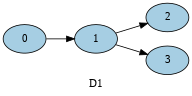

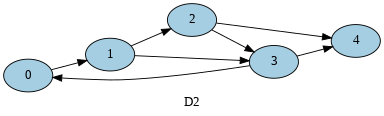

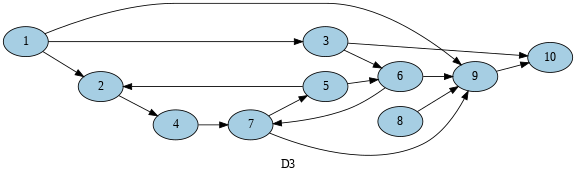

In [22]:
# @title {"run":"auto","vertical-output":true}
import networkx as nx

def M_B (u, v, d: nx.DiGraph()) -> bool:
  # Escreva aqui o seu código
  return nx.has_path(d, u, v)

def f5 (x, y, d: nx.DiGraph()) -> tuple[Any,Any,nx.DiGraph()]:
  # Escreva aqui o seu código
  return (y, x, d)

def M_A (x, y, d: nx.DiGraph()) -> bool:
  # Escreva aqui o seu código
  vals = f5(x, y, d)
  return M_B(vals[0], vals[1], vals[2])

# Grafos para teste
D1 = nx.DiGraph([(0, 1), (1, 2), (1, 3)])
D2 = nx.DiGraph([(0, 1), (1, 2), (1, 3), (2, 3), (3, 0), (2, 4), (3, 4)])
D3 = nx.DiGraph([(1, 2), (1, 3), (2, 4), (5, 2), (3, 6), (4, 7), (7, 5),
         (6, 7), (7, 9), (8, 9), (9, 10), (3, 10), (1, 9), (6, 9), (5, 6)])
drawgv_graph(D1,'dot',name='D1',title='D1',width=2)
print()
drawgv_graph(D2,'dot',name='D2',title='D2',width=4)
print()
drawgv_graph(D3,'dot',name='D3',title='D3',width=6)
# Testes Manuais
assert M_A(3,1,D1) is True
assert M_A(1,3,D1) is False
assert M_A(3,1,D2) is True
assert M_A(1,3,D2) is True
assert M_A(1,4,D2) is False
assert M_A(4,1,D2) is True
assert M_A(6,4,D3) is True
assert M_A(4,6,D3) is True
assert M_A(1,6,D3) is False

In [23]:
# @title Testes Automáticos
# Testes
class Test_Q03 (unittest.TestCase):

  def test_f5 (self):
    self.assertEqual(f5(1,2,D1),(2,1,D1))
    self.assertEqual(f5(1,3,D1),(3,1,D1))
    self.assertEqual(f5(1,2,D2),(2,1,D2))
    self.assertEqual(f5(1,3,D2),(3,1,D2))
    self.assertEqual(f5(1,4,D2),(4,1,D2))
    self.assertEqual(f5(4,1,D2),(1,4,D2))

  def test_M_B (self):
    self.assertEqual(M_B(2,0,D1),False)
    self.assertEqual(M_B(1,3,D1),True)
    self.assertEqual(M_B(1,2,D2),True)
    self.assertEqual(M_B(1,3,D2),True)
    self.assertEqual(M_B(1,4,D2),True)
    self.assertEqual(M_B(4,1,D2),False)
    self.assertEqual(M_B(10,3,D3),False)
    self.assertEqual(M_B(4,6,D3),True)
    self.assertEqual(M_B(1,6,D3),True)

  def test_M_A (self):
    self.assertEqual(M_A(3,1,D1),True)
    self.assertEqual(M_A(1,3,D1),False)
    self.assertEqual(M_A(3,1,D2),True)
    self.assertEqual(M_A(1,3,D2),True)
    self.assertEqual(M_A(1,4,D2),False)
    self.assertEqual(M_A(4,1,D2),True)
    self.assertEqual(M_A(6,4,D3),True)
    self.assertEqual(M_A(4,6,D3),True)
    self.assertEqual(M_A(1,6,D3),False)

  def test_M_A_F(self):
    self.assertTrue(is_function_invoked(M_A,M_B))
    self.assertTrue (is_function_invoked(M_A,f5))

unittest.main(argv=[''], defaultTest='Test_Q03', verbosity=2, exit=False)

test_M_A (__main__.Test_Q03) ... ok
test_M_A_F (__main__.Test_Q03) ... ok
test_M_B (__main__.Test_Q03) ... ok
test_f5 (__main__.Test_Q03) ... ok

----------------------------------------------------------------------
Ran 4 tests in 0.015s

OK
